<a href="https://colab.research.google.com/github/Zeeshan506/ArchTechnology-Internship-Projects/blob/main/ARCH_TECHNOLOGIES_AI_Internship_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Task 2: Housing Price Prediction***

        Using the California housing dataset, also available on Kaggle an build a machine learning model
        
        to predict house prices based on features like location, number of rooms, and population.
        
        Your task is to clean data,select important features, train the model, and evaluate its accuracy.
        

### Importing Libraries

In [11]:
# Since we have all the libraries already imported we start with fetching the dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline


california = fetch_california_housing(as_frame=True)

df = california.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### Data Preprocessing

In [2]:
# Statistical Values of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
# finding out the rows and columns of the dataset.
df_tuple = df.shape
print(f"Rows: {df_tuple[0]}, Columns: {df_tuple[1]}")

Rows: 20640, Columns: 9


In [4]:
# all the columns in the dataset
print("----------- Columns in the dataset -----------")
for i in df.keys():
  print(i)

----------- Columns in the dataset -----------
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
MedHouseVal


In [5]:
# count of null values in the dataset
print("---------------- no of null values in each columns ----------------\n\n",df.isnull().sum(),"\n----------------  ---------------- ----------------  ----------------")

---------------- no of null values in each columns ----------------

 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64 
----------------  ---------------- ----------------  ----------------


In [6]:
# count of duplicates values in the dataset
print("---------------- no of Duplicated Value ----------------\n\n",df.duplicated().sum(),"\n----------------  ----------------  ----------------")

---------------- no of Duplicated Value ----------------

 0 
----------------  ----------------  ----------------


### Visualization

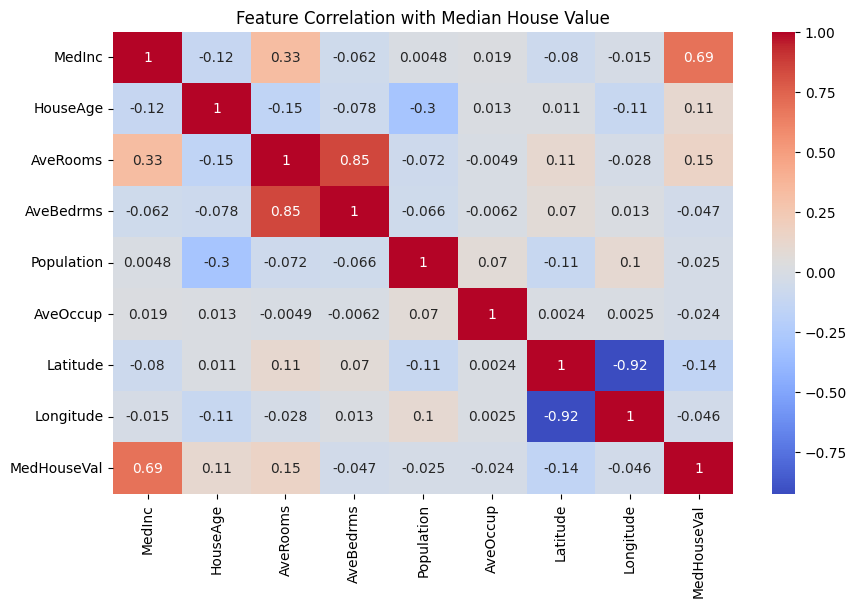

In [9]:
# visualization to indetify features to use for training
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Median House Value")
plt.show()


### Training the model


In [12]:
X = df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge','Population','Latitude','Longitude','AveBedrms']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: 0.8043216552088295
Random Forest MSE: 0.25641865986166834


In [14]:
# for making a prediction
new_data = pd.DataFrame([{
    'MedInc': 5.0,
    'AveRooms': 6.2,
    'AveOccup': 2.1,
    'HouseAge': 25,
    'Population': 1500,
    'Latitude': 34.25,
    'Longitude': -118.3,
    'AveBedrms': 1.0
}])

# Predict
predicted_price = rf.predict(new_data)

print(f"Predicted House Value: ${int(predicted_price[0] * 100000):,}")

Predicted House Value: $329,393


### Feature Analysis

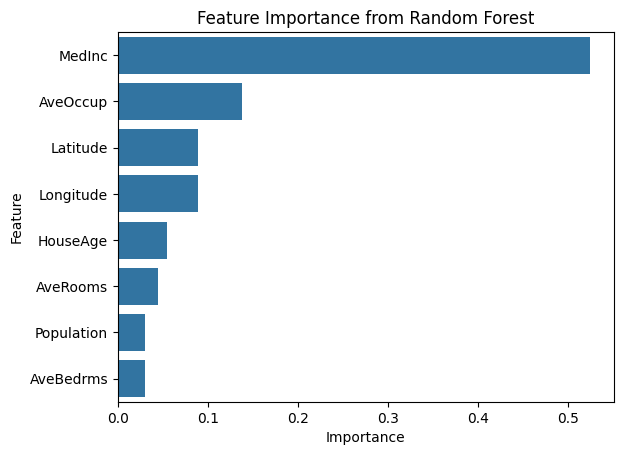

<Figure size 300x300 with 0 Axes>

In [15]:
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.figure(figsize=(3,3))
plt.show()